## CIFAR10 Dataset 신경망으로 훈련

#### imports

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#### 데이터 적재

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images[0].shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(32, 32, 3)


In [5]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

#### 데이터 시각화

In [7]:
train_labels = np.int32(train_labels.flatten())

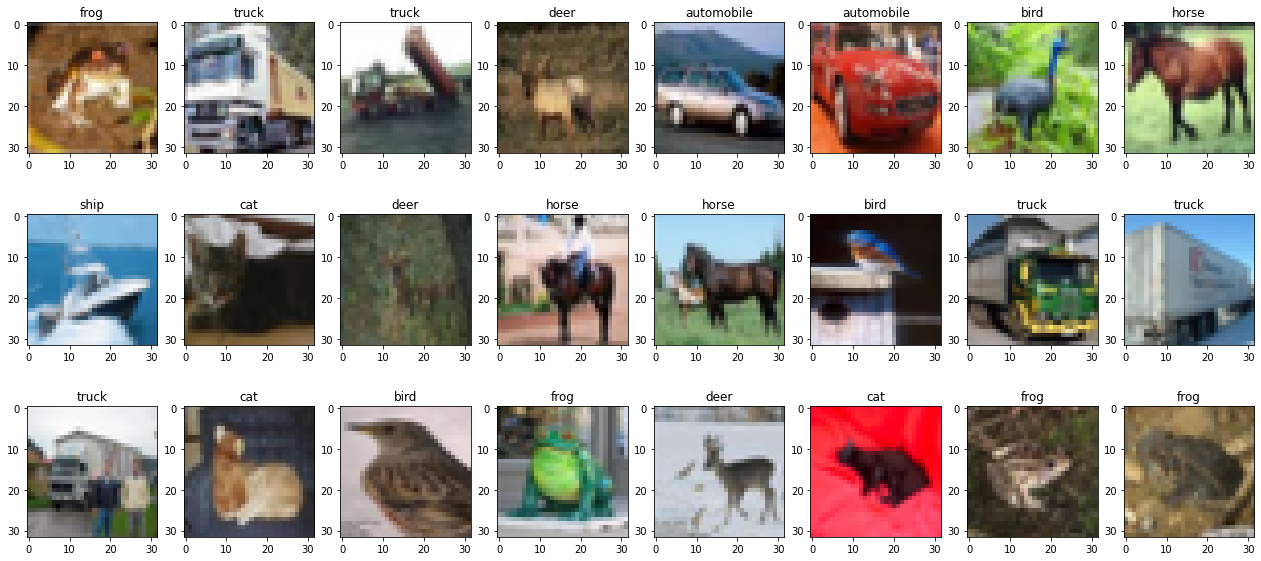

In [8]:
figure, axes = plt.subplots(figsize=(22, 10), nrows=3, ncols=8)

for i in range(3):
    for j in range(8):
        axes[i][j].imshow(train_images[(i*8)+j])
        axes[i][j].set_title(class_names[train_labels[(i*8)+j]])


#### 데이터 전처리

In [9]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [10]:
test_oh_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

#### 모델 생성

In [11]:
def build_model():
  tf.keras.backend.clear_session()

  input_tensor = Input(shape=(32, 32, 3))
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
                  
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)                 
                  
  x = Flatten()(x)
  x = Dropout(rate=0.5)(x)                 
  x = Dense(300, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  x = Dense(100, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  output = Dense(10, activation="softmax")(x)

  model = Model(inputs=input_tensor, outputs=output)
  return model


In [16]:
model = build_model()

#### 모델 컴파일

In [17]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

#### 모델 학습

In [19]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size = batch_size, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 58s 24ms/step - loss: 1.7155 - accuracy: 0.3638 - val_loss: 1.5016 - val_accuracy: 0.4403
Epoch 2/30
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2472 - accuracy: 0.5586 - val_loss: 1.0512 - val_accuracy: 0.6155
Epoch 3/30
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0346 - accuracy: 0.6438 - val_loss: 0.9817 - val_accuracy: 0.6552
Epoch 4/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9000 - accuracy: 0.6937 - val_loss: 0.9400 - val_accuracy: 0.6809
Epoch 5/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.8184 - accuracy: 0.7207 - val_loss: 0.7343 - val_accuracy: 0.7447
Epoch 6/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7414 - accuracy: 0.7515 - val_loss: 0.7432 - val_accuracy: 0.7463
Epoch 7/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6703 - accuracy: 0.7750 - val_loss: 0.8668 -

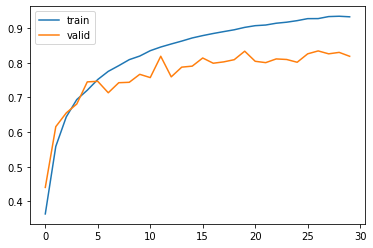

In [20]:
plt.plot(history.history["accuracy"], label="train" )
plt.plot(history.history["val_accuracy"], label="valid" )
plt.legend()

#### 테스트 데이터에서 검증

In [22]:
evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.7298 - accuracy: 0.8141


### Callback 적용(ModelCheckPoint, EarlyStopping, ReduceLROnPlateau)

#### 모델 생성 및 컴파일

In [23]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0     

In [24]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

#### Callback 정의

In [28]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

#### 모델 학습

In [29]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size = batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6663 - accuracy: 0.3844 - val_loss: 1.4542 - val_accuracy: 0.4628

Epoch 00001: val_loss improved from inf to 1.45418, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2310 - accuracy: 0.5645 - val_loss: 1.1085 - val_accuracy: 0.6126

Epoch 00002: val_loss improved from 1.45418 to 1.10846, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0336 - accuracy: 0.6461 - val_loss: 0.9541 - val_accuracy: 0.6673

Epoch 00003: val_loss improved from 1.10846 to 0.95408, saving model to my_keras_model.h5
Epoch 4/40
1250/1250 [==============================] - 27s 21ms/step - loss: 0.8996 - accuracy: 0.6940 - val_loss: 0.7979 - val_accuracy: 0.7329

Epoch 00004: val_loss improved from 0.95408 to 0.79795, saving model to my_keras_model.h5
Epoch 5/40
1250/1250 [==============================] - 

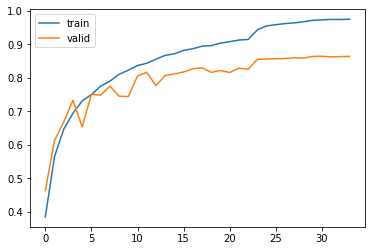

In [30]:
plt.plot(history.history["accuracy"], label="train" )
plt.plot(history.history["val_accuracy"], label="valid" )
plt.legend()

In [31]:
evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.5252 - accuracy: 0.8521


### 필터수, 은닉층 수 증가

#### 모델 생성

In [35]:
def build_extended_model():
  tf.keras.backend.clear_session()

  input_tensor = Input(shape=(32, 32, 3))
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
                  
  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  #x = MaxPooling2D(pool_size=(2, 2))(x)                 

  x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x) 

  x = Flatten()(x)
  x = Dropout(rate=0.5)(x)                 
  x = Dense(300, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  x = Dense(100, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  output = Dense(10, activation="softmax")(x)

  model = Model(inputs=input_tensor, outputs=output)
  return model


#### 모델 생성 및 컴파일

In [37]:
model = build_extended_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [38]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

#### Callback 정의

In [39]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)


#### 모델 학습

In [40]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size = batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 45s 34ms/step - loss: 1.9010 - accuracy: 0.2892 - val_loss: 1.8232 - val_accuracy: 0.3345

Epoch 00001: val_loss improved from inf to 1.82324, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 44s 36ms/step - loss: 1.4290 - accuracy: 0.4776 - val_loss: 1.3944 - val_accuracy: 0.4879

Epoch 00002: val_loss improved from 1.82324 to 1.39438, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 42s 34ms/step - loss: 1.1695 - accuracy: 0.5913 - val_loss: 1.1177 - val_accuracy: 0.6297

Epoch 00003: val_loss improved from 1.39438 to 1.11772, saving model to my_keras_model.h5
Epoch 4/40
1250/1250 [==============================] - 44s 36ms/step - loss: 0.9969 - accuracy: 0.6601 - val_loss: 1.0691 - val_accuracy: 0.6441

Epoch 00004: val_loss improved from 1.11772 to 1.06911, saving model to my_keras_model.h5
Epoch 5/40
1250/1250 [==============================] - 

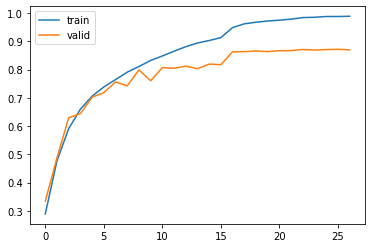

In [41]:
plt.plot(history.history["accuracy"], label="train" )
plt.plot(history.history["val_accuracy"], label="valid" )
plt.legend()

In [ ]:
#### 테스트 데이터에서 평가

In [42]:
evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 4s 11ms/step - loss: 0.5149 - accuracy: 0.8612


### Global Average Pooling 적용

In [44]:
def build_extended_gap_model():
  tf.keras.backend.clear_session()

  input_tensor = Input(shape=(32, 32, 3))
  x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
                  
  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  #x = MaxPooling2D(pool_size=(2, 2))(x)                 

  x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x) 

  # x = Flatten()(x)
  x = GlobalAveragePooling2D()(x)
  x = Dropout(rate=0.5)(x)                 
  x = Dense(300, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  x = Dense(100, activation="relu")(x)
  x = Dropout(rate=0.3)(x)
  output = Dense(10, activation="softmax")(x)

  model = Model(inputs=input_tensor, outputs=output)
  return model


#### 모델 생성 및 컴파일

In [45]:
model = build_extended_gap_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [46]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

#### Callback 정의

In [47]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)


#### 모델 학습

In [ ]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size = batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 43s 33ms/step - loss: 1.6606 - accuracy: 0.3770 - val_loss: 2.4914 - val_accuracy: 0.2898

Epoch 00001: val_loss improved from inf to 2.49137, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 41s 33ms/step - loss: 1.2225 - accuracy: 0.5664 - val_loss: 1.2138 - val_accuracy: 0.5749

Epoch 00002: val_loss improved from 2.49137 to 1.21383, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.9928 - accuracy: 0.6583 - val_loss: 0.9320 - val_accuracy: 0.6799

Epoch 00003: val_loss improved from 1.21383 to 0.93197, saving model to my_keras_model.h5
Epoch 4/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.8404 - accuracy: 0.7151 - val_loss: 1.1202 - val_accuracy: 0.6427

Epoch 00004: val_loss did not improve from 0.93197
Epoch 5/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.7286 - accuracy

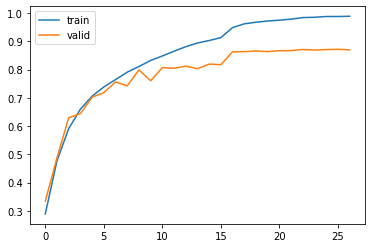

In [ ]:
plt.plot(history.history["accuracy"], label="train" )
plt.plot(history.history["val_accuracy"], label="valid" )
plt.legend()

In [ ]:
#### 테스트 데이터에서 평가

In [ ]:
evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 4s 11ms/step - loss: 0.5149 - accuracy: 0.8612
